In [897]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [898]:
df = pd.read_csv("Watertypes_data_alt.csv")#, encoding='cp1252')
df.head()

,id,Name,Paper,Water type,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_0,HD_60,HD_diff,ksed (1/h)
0,1,Santa Barbara seawater,Keller,seawater,8.05,37400,3133.0,19333.0,377.8,10620.0,398.0,1361.4,10.0,477.51,1227.25,749.74,0.3980
1,2,artificial seawater,Keller,seawater,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,10.0,477.51,1227.25,749.74,0.0596
2,3,artificial seawater,Keller,seawater,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,50.0,909.19,1950.62,1041.43,0.2050
3,4,artificial seawater,Keller,seawater,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,100.0,886.48,1948.86,1062.38,0.3830
4,5,artificial seawater,Keller,seawater,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,200.0,886.48,1948.86,1062.38,0.6690


In [899]:
# Drop the columns that don't consist data
df = df[df.columns[~df.columns.isin(['id', 'Name', 'Paper', 'Water type'])]]#, 'ksed (1/h)'])]]
print("The df dataframe shape is: ", df.shape)
df.head()

The df dataframe shape is:  (40, 13)


,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_0,HD_60,HD_diff,ksed (1/h)
0,8.05,37400,3133.0,19333.0,377.8,10620.0,398.0,1361.4,10.0,477.51,1227.25,749.74,0.3980
1,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,10.0,477.51,1227.25,749.74,0.0596
2,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,50.0,909.19,1950.62,1041.43,0.2050
3,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,100.0,886.48,1948.86,1062.38,0.3830
4,7.99,36300,2550.0,17667.0,339.8,9726.0,376.0,1225.4,200.0,886.48,1948.86,1062.38,0.6690


In [900]:
# Calculate the Pearson Correlation matrix
corr_mat = df.corr(method='pearson')
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
upper

C:\Users\vassi\AppData\Local\Temp\ipykernel_20980\1965813344.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


,pH,Conductivity (uS),SO4 (mg/l),Cl (mg/l),K (mg/l),Na (mg/l),Ca (mg/l),Mg (mg/l),Concentration (mg/l),HD_0,HD_60,HD_diff,ksed (1/h)
pH,NaN,0.130541,0.087943,0.053189,0.123582,0.114914,0.067432,0.104657,0.109128,-0.132121,-0.359916,-0.444343,0.037068
Conductivity (uS),NaN,NaN,0.977888,0.980686,0.990917,0.993953,0.909283,0.989649,-0.127132,0.302009,0.232531,0.196025,0.172200
SO4 (mg/l),NaN,NaN,NaN,0.965484,0.965566,0.974489,0.954002,0.979588,-0.125010,0.319166,0.275704,0.249858,0.247559
Cl (mg/l),NaN,NaN,NaN,NaN,0.986560,0.990338,0.902609,0.990047,-0.083186,0.338846,0.314590,0.288458,0.205981
K (mg/l),NaN,NaN,NaN,NaN,NaN,0.995404,0.916140,0.993766,-0.101967,0.326913,0.251738,0.206946,0.176140
Na (mg/l),NaN,NaN,NaN,NaN,NaN,NaN,0.911452,0.997697,-0.100121,0.341246,0.285228,0.250526,0.202243
Ca (mg/l),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.932639,-0.081068,0.415268,0.338523,0.283272,0.323841
Mg (mg/l),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.083570,0.372868,0.321553,0.283769,0.238811
Concentration (mg/l),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496325,0.454207,0.361752,0.465365
HD_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833533,0.662555,0.756580


<AxesSubplot:>

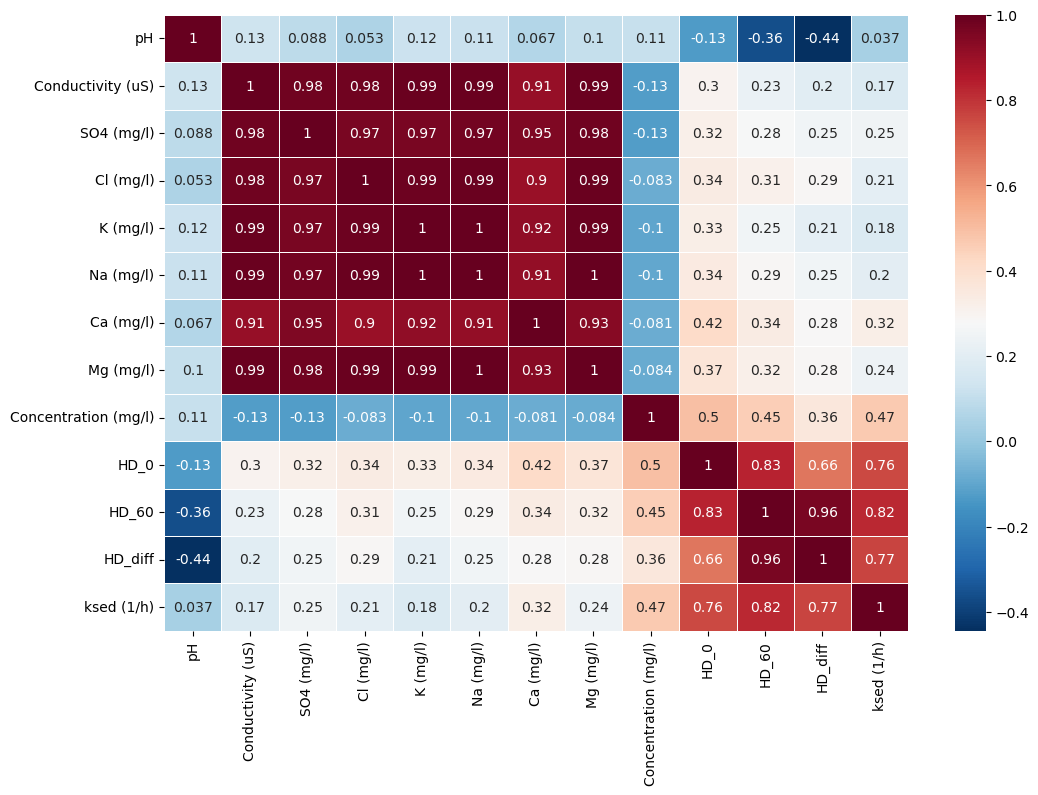

In [901]:
sb.heatmap(corr_mat, 
            xticklabels=corr_mat.columns,
            yticklabels=corr_mat.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [902]:
# Set a correlation threshold to eliminate features
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['SO4 (mg/l)',
 'Cl (mg/l)',
 'K (mg/l)',
 'Na (mg/l)',
 'Ca (mg/l)',
 'Mg (mg/l)',
 'HD_diff']

In [903]:
# Drop the correlated features
df = df.drop(to_drop, axis=1)
df = df.drop(['HD_0'], axis=1)

df = df.dropna()
df.head()
column_names = df.columns
print(column_names)

Index(['pH', 'Conductivity (uS)', 'Concentration (mg/l)', 'HD_60',
       'ksed (1/h)'],
      dtype='object')


In [904]:
# drop the k_sed column 
x = df.drop(['ksed (1/h)'], axis=1)

#scale the columns
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x.to_numpy())
x_scaled = pd.DataFrame(x_scaled, columns = column_names[0:(len(column_names)-1)])

#x_scaled.head()
#x.head()

In [905]:
# Take the y values
y = df['ksed (1/h)']

In [906]:
# Split the dataset to train and test sets

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=0)

print("x_train = ", x_train.shape)
print("y_train = ", y_train.shape)
print("x_test = ", x_test.shape)
print("y_test = ", y_test.shape)


x_train =  (21, 4)
y_train =  (21,)
x_test =  (14, 4)
y_test =  (14,)


In [907]:
RF = RandomForestRegressor(n_estimators = 10,
                           max_depth = 50,
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           criterion = 'squared_error') #, random_state=0)

RF.fit(x_train, y_train)

y_train_pred = RF.predict(x_train)
y_test_pred = RF.predict(x_test)

print(f'Train MSE = {mean_squared_error(y_train, y_train_pred)}' )
print(f'Test MSE = {mean_squared_error(y_test, y_test_pred)}' )

Train MSE = 0.0032513000585714276
Test MSE = 0.0014584115235000007


In [908]:
def evaluate(best_candidate, new_candidate):
    print('Overall Best Grid Search Candidate')
    print(f'Train MSE = {mean_squared_error(y_train, best_candidate.predict(x_train))}')
    print(f'Test MSE = {mean_squared_error(y_test, best_candidate.predict(x_test))}')
    print('New Grid Search Best Candidate')
    print(f'Train MSE = {mean_squared_error(y_train, new_candidate.predict(x_train))}')
    print(f'Test MSE = {mean_squared_error(y_test, new_candidate.predict(x_test))}')

In [909]:
# Tuning of Random Forest parameters with Grid search
param_grid = {'max_depth': [50, 70, 90, 100, None],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2],
              'n_estimators': [10, 100]}

RF_grid = RandomForestRegressor(criterion = 'squared_error')

# RandomizedSearchCV() is the same as grid_search, but fits only a subset of the possible models, depended on the n_iter parameter.
# If n_iter exceeds the number of the possible models, then it is exactly the same as GridSearchCV().

# The negative MSE is used as a scoring function, and i used 3-fold cross-validation due to the small number of data
grid_search = RandomizedSearchCV(estimator = RF_grid, param_distributions = param_grid, scoring = 'neg_mean_squared_error',
                                 n_iter = 300, cv = 3, verbose=2, random_state=0, n_jobs = 6)

# grid_search = GridSearchCV(estimator = RF_grid, param_grid = param_grid, 
#                           cv = 2, n_jobs = 6, verbose = 2)   


grid_search.fit(x_train, y_train)

# Return the parameters of the best model
grid_search.best_params_#, grid_search.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\vassi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=300. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 50}

In [910]:
# #best_candidate = grid_search.best_estimator_
# new_candidate = grid_search.best_estimator_

# evaluate(best_candidate, new_candidate)

# if mean_squared_error(y_test, new_candidate.predict(x_test)) < mean_squared_error(y_test, best_candidate.predict(x_test))  :
#     best_candidate = new_candidate
#     best_params = grid_search.best_params_
#     print("New best candidate detected")

In [911]:
#best_params 

In [912]:
# Set up the final model
RF_final = grid_search.best_estimator_
RF_final
# RF_final = RandomForestRegressor(n_estimators = 10,
#                            max_depth = 90,
#                            min_samples_split = 2,
#                            min_samples_leaf = 1,
#                            criterion = 'squared_error')#, random_state=0)


RandomForestRegressor(max_depth=50, min_samples_leaf=2, n_estimators=10)

In [928]:
# Fit the final model on the whole training dataset and print the MSE scores on train and test data

RF_final.fit(x_train, y_train)


y_pred_train = RF_final.predict(x_train)
y_pred_test = RF_final.predict(x_test)
y_pred_general = RF_final.predict(x_scaled)

train_score = mean_squared_error(y_train, y_pred_train)
test_score = mean_squared_error(y_test, y_pred_test)
general_score = mean_squared_error(y, y_pred_general)

scores = {'Train MSE': [train_score],
          'Test MSE': [test_score],
          'General MSE': [general_score]}

pd.DataFrame(data=scores)

,Train MSE,Test MSE,General MSE
0,0.007889,0.001616,0.00538


In [914]:
# Print the observed y versus the predicted y and calculate the % relative absolute error

#pd.DataFrame({'y_test': y_test,  'y_pred_test': y_pred_test, '%_error': np.absolute(y_test - y_pred_test)*100/y_test})
pd.DataFrame({'y_obs': y,  'y_pred': y_pred_general, '%_error': np.absolute(y - y_pred_general)*100/y})


,y_obs,y_pred,%_error
0,0.39800,0.388364,2.421189
1,0.05960,0.391579,557.011186
2,0.20500,0.391579,91.013984
3,0.38300,0.409145,6.826458
4,0.66900,0.409145,38.842252
5,0.39800,0.362364,8.953727
6,0.20300,0.094903,53.249513
12,0.00573,0.017743,209.646514
13,0.00573,0.016826,193.643023
14,0.00573,0.016826,193.643023


In [915]:
importances = RF_final.feature_importances_
predictors_names = x_train.columns
forest_importances = pd.Series(importances, index=predictors_names)
forest_importances[forest_importances>0].sort_values(ascending=False)

HD_60                   0.872160
pH                      0.105043
Concentration (mg/l)    0.013259
Conductivity (uS)       0.009538
dtype: float64

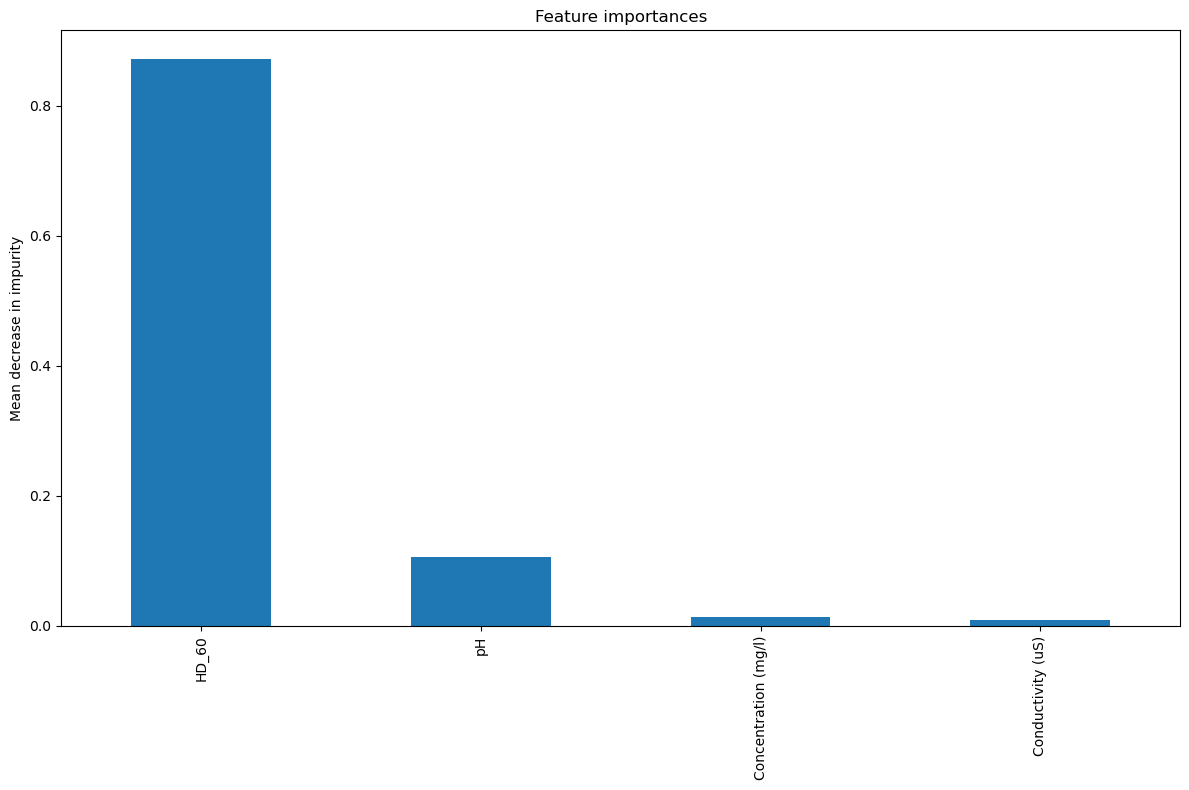

In [916]:
plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.subplots()
forest_importances[0:15].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()